In [1]:
pylab inline

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [79]:
try:
    reload(dc)
    print  'dc reloaded'
except Exception:
    print 'dc not loaded yet'
    

dc reloaded


In [80]:
WORDSIZE = 32
import dnnConnectivityAndMemoryAllocation as dc

# Create memory
memory = dc.Memory(2,32,8,4096)

# Create DNN
network = dc.Network()
#                                    X    Y    Z    Kx   Ky   Kz   stride
#network.addLayer('Input',          224, 224,    3                      ) #    3 
#network.addLayer('Convolutional',   55,  55,   96,   11,  11,    3,   4 ) #   96,
#network.addLayer('Convolutional',   27,  27,  256,    5,   5,   96,   2 ) #  256,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  256,   2 ) #  384,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  384,   1 ) #  384,
# network.addLayer('Fully Connected', 13,  13,  256,    3,   3,  384,   1 ) #  256,
# network.addLayer('Fully Connected',  1,   1, 4096,   13,  13,  256,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 4096,    1,   1, 4096,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 1024,    1,   1, 4096,   1 ) # 1024,

#network.addLayer('Input',          224, 224,    3                      ) #    3 
#network.addLayer('Convolutional',   55,  55,   10,   11,  11,    3,   4 ) #   96,
network.addLayer('Input',           55,  55,    3,                      ) #   96,
network.addLayer('Convolutional',   27,  27,    5,    5,   5,    3,   2 ) #  256,
network.addLayer('Convolutional',   13,  13,   10,    3,   3,    5,   2 ) #  384,
#network.addLayer('Convolutional',   13,  13,    8,    3,   3,   10,   1 ) #  384,
#network.addLayer('Fully Connected', 13,  13,    6,    3,   3,    8,   1 ) #  256,
#network.addLayer('Fully Connected',  1,   1,    6,   13,  13,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    4,   1 ) # 1024,

network.assignPEs()






LEE:DEBUG:line 486 0 : 0 0 141
141
LEE:DEBUG:line 486 0 : 0 1 141
282
LEE:DEBUG:line 486 0 : 0 2 141
423
LEE:DEBUG:line 486 0 : 0 3 141
564
LEE:DEBUG:line 486 0 : 0 4 141
705
LEE:DEBUG:line 486 0 : 0 5 141
846
LEE:DEBUG:line 486 0 : 0 6 141
987
LEE:DEBUG:line 486 0 : 0 7 141
1128
LEE:DEBUG:line 486 0 : 1 0 141
1269
LEE:DEBUG:line 486 0 : 1 1 141
1410
LEE:DEBUG:line 486 0 : 1 2 141
1551
LEE:DEBUG:line 486 0 : 1 3 141
1692
LEE:DEBUG:line 486 0 : 1 4 141
1833
LEE:DEBUG:line 486 0 : 1 5 142
1975
LEE:DEBUG:line 486 0 : 1 6 142
2117
LEE:DEBUG:line 486 0 : 1 7 142
2259
LEE:DEBUG:line 486 0 : 2 0 142
2401
LEE:DEBUG:line 486 0 : 2 1 142
2543
LEE:DEBUG:line 486 0 : 2 2 142
2685
LEE:DEBUG:line 486 0 : 2 3 142
2827
LEE:DEBUG:line 486 0 : 2 4 142
2969
LEE:DEBUG:line 486 0 : 2 5 142
3111
LEE:DEBUG:line 486 0 : 2 6 142
3253
LEE:DEBUG:line 486 0 : 2 7 142
3395
LEE:DEBUG:line 486 0 : 3 0 142
3537
LEE:DEBUG:line 486 0 : 3 1 142
3679
LEE:DEBUG:line 486 0 : 3 2 142
3821
LEE:DEBUG:line 486 0 : 3 3 142
3963

In [81]:
for l in range(1, network.numberOfLayers):
  network.Layers[l].generateConnections()


Updating Layer 1 connections for features in row :0
Updating Layer 1 connections for features in row :1
Updating Layer 1 connections for features in row :2
Updating Layer 1 connections for features in row :3
Updating Layer 1 connections for features in row :4
Updating Layer 1 connections for features in row :5
Updating Layer 1 connections for features in row :6
Updating Layer 1 connections for features in row :7
Updating Layer 1 connections for features in row :8
Updating Layer 1 connections for features in row :9
Updating Layer 1 connections for features in row :10
Updating Layer 1 connections for features in row :11
Updating Layer 1 connections for features in row :12
Updating Layer 1 connections for features in row :13
Updating Layer 1 connections for features in row :14
Updating Layer 1 connections for features in row :15
Updating Layer 1 connections for features in row :16
Updating Layer 1 connections for features in row :17
Updating Layer 1 connections for features in row :18
Upd

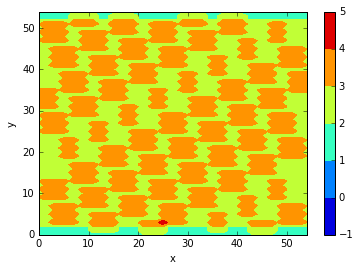

In [82]:
network.Layers[0].displayTargetPECounts()


In [83]:
lid = 0
numOfPEs = network.Layers[lid].getTargetPECounts()


In [84]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)
#print numOfPEs
np.set_printoptions(threshold=1000)



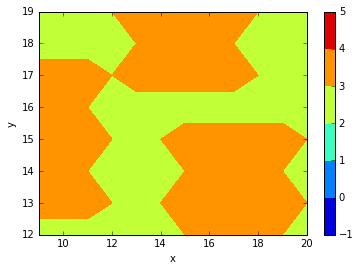

In [85]:
#region = np.array([50,65,45,65])
region = np.array([12,20,9,21])
network.Layers[0].displayTargetPECountsRegion(region)

In [86]:
network.peArray.pe[0][2].findROI(layerID)

array([[ 0,  0, 43],
       [ 2,  5, 15]])

In [87]:
layerID = 1
for peY in range(network.peY) :
  for peX in range(network.peX) :
    network.peArray.pe[peY][peX].findROI(layerID)
    print network.peArray.pe[peY][peX]
    network.managerArray.manager[peY][peX].memCpyROI(layerID)



PE 0,0               
layer0 Not calculated 
layer1 roi coords: [0 0 0],[ 2  3 25] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              
[[ 0  0  0]
 [ 2  3 25]]

PE 0,1               
layer0 Not calculated 
layer1 roi coords: [ 0  0 21],[ 2  3 47] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              
[[ 0  0 21]
 [ 2  3 47]]

PE 0,2               
layer0 Not calculated 
layer1 roi coords: [ 0  0 43],[ 2  5 15] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              
[[ 0  0 43]
 [ 2  5 15]]

PE 0,3               
layer0 Not calculated 
layer1 roi coords: [ 0  1 11],

In [88]:
tempZ = network.managerArray.manager[4][4].roiCells[1][1][0][0].Z
tempY = network.managerArray.manager[4][4].roiCells[1][1][0][0].Y
tempX = network.managerArray.manager[4][4].roiCells[1][1][0][0].X
network.managerArray.manager[4][4].roiCells[1][1][0][0]


<dnnConnectivityAndMemoryAllocation.Cell instance at 0x116209908>

In [89]:
print network.managerArray.manager[4][4].roiCells[1][1][0][0]


Cell:1,29,7                                               
Layer:0                                                      
PE{Y,X} : 4,1                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'copiedTo', 'kernel', 'memoryLocation', 'layerID', 'Y', 'X', 'Z', 'originalCell', 'roiFromSrcCells', 'targetCells', 'parentLayer', 'targetPEs', 'sourcePEs', 'PE', 'sourceCells']                                                    


In [90]:
network.managerArray.manager[4][4].roiCells[1][1][0][0].memoryLocation

<dnnConnectivityAndMemoryAllocation.MemoryLocation instance at 0x116209950>

In [91]:
network.managerArray.manager[4][4].roiCells[1][1][0][0].originalCell

<dnnConnectivityAndMemoryAllocation.Cell instance at 0x114cbc680>

In [92]:
network.Layers[0].cells[tempZ][tempY][tempX]

<dnnConnectivityAndMemoryAllocation.Cell instance at 0x114cbc680>

In [93]:
print network.Layers[0].cells[tempZ][tempY][tempX]


Cell:1,29,7                                               
Layer:0                                                      
PE{Y,X} : 4,1                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalCell']                                                    


In [94]:
network.Layers[0].cells[tempZ][tempY][tempX].memoryLocation

<dnnConnectivityAndMemoryAllocation.MemoryLocation instance at 0x114cbc878>

In [95]:
network.Layers[0].cells[tempZ][tempY][tempX].copiedTo

[<dnnConnectivityAndMemoryAllocation.Cell instance at 0x11613db48>,
 <dnnConnectivityAndMemoryAllocation.Cell instance at 0x116209908>]

In [96]:
network.managerArray.manager[0][0].allocateMemory(memory,layerID)
for y in range(network.managerArray.manager[0][0].roiCells[layerID][0].__len__()):
  for x in range(network.managerArray.manager[0][0].roiCells[layerID][0][0].__len__()):
    for z in range(network.managerArray.manager[0][0].roiCells[layerID].__len__()):
        print network.managerArray.manager[0][0].roiCells[layerID][z][y][x]



Cell:0,0,0                                               
Layer:0                                                      
PE{Y,X} : 0,0                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'copiedTo', 'kernel', 'memoryLocation', 'layerID', 'Y', 'X', 'Z', 'originalCell', 'roiFromSrcCells', 'targetCells', 'parentLayer', 'targetPEs', 'sourcePEs', 'PE', 'sourceCells']                                                    

Cell:1,0,0                                               
Layer:0                                                      
PE{Y,X} : 0,0                                            
Memory:{Ch, Bank, Page, Word}:1,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                

In [97]:
print network.Layers[1].cells[0][25][25]



Cell:0,25,25                                               
Layer:1                                                      
PE{Y,X} : 7,5                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [ 0 49 49] [ 2 53 53] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalCell']                                                    


In [98]:
print network.peArray.pe[3][3].getROI(1)

[[ 0 21 19]
 [ 2 25 45]]


In [99]:
layerID = 1
x = 0
y = 0
print network.managerArray.manager[y][x]
print network.managerArray.manager[y][x].pe
print '\n' + str(network.managerArray.manager[y][x].pe.cellsProcessed[layerID].__len__())
for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID] :
  
  nv = c.findROI()
  print c

    






Manager 0,0 
Methods: ['allocateMemory', 'memCpyROI']    
Fields: ['roiCells', 'ID', 'parentManagerArray', 'pe']     

PE 0,0               
layer0 Not calculated 
layer1 roi coords: [0 0 0],[ 2  3 25] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              

56

Cell:0,0,0                                               
Layer:1                                                      
PE{Y,X} : 0,0                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [2 3 3] || [0 0 0],[2 3 3]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalCell']        

In [100]:
x += 1
print network.managerArray.manager[y][x]
print network.managerArray.manager[y][x].pe
print '\n' + str(network.managerArray.manager[y][x].pe.cellsProcessed[layerID].__len__())
for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID] :
  nv = c.findROI()
  print c


Manager 0,1 
Methods: ['allocateMemory', 'memCpyROI']    
Fields: ['roiCells', 'ID', 'parentManagerArray', 'pe']     

PE 0,1               
layer0 Not calculated 
layer1 roi coords: [ 0  0 21],[ 2  3 47] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              

56

Cell:1,0,11                                               
Layer:1                                                      
PE{Y,X} : 0,1                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [ 0  0 21] [ 2  3 25] || [ 0  0 21],[ 2  3 25]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'origin

In [101]:
for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID][0].sourceCells :
  print c




Cell:1,2,21                                               
Layer:0                                                      
PE{Y,X} : 0,2                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalCell']                                                    

Cell:2,2,22                                               
Layer:0                                                      
PE{Y,X} : 0,2                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']              

In [102]:
print network.Layers[1].cells[0][25][25].findROI()
print network.Layers[1].cells[0][25][25]

[[ 0 49 49]
 [ 2 53 53]]

Cell:0,25,25                                               
Layer:1                                                      
PE{Y,X} : 7,5                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [ 0 49 49] [ 2 53 53] || [ 0 49 49],[ 2 53 53]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalCell']                                                    


In [103]:
print type(network.Layers[1].cells[0][25][25].roi)
print type(network.peArray.pe[0][0].findROI(layerID))
print type(network.peArray.pe[0][0].roi[1])

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [104]:
layerID = 1
y = 0
x = 1
print network.managerArray.manager[y][x].pe
for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID] :
  print c.findROI()
  for s in c.sourceCells:
        print s.X


PE 0,1               
layer0 Not calculated 
layer1 roi coords: [ 0  0 21],[ 2  3 47] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              
[[ 0  0 21]
 [ 2  3 25]]
21
22
22
21
21
25
22
25
25
22
25
21
21
24
25
21
25
22
21
23
22
22
25
21
23
24
23
21
23
24
24
22
23
22
21
23
25
25
24
23
25
24
21
22
24
22
23
24
25
24
24
25
23
24
21
23
23
22
24
23
[[ 0  0 21]
 [ 2  3 25]]
21
22
22
21
21
25
22
25
25
22
25
21
21
24
25
21
25
22
21
23
22
22
25
21
23
24
23
21
23
24
24
22
23
22
21
23
25
25
24
23
25
24
21
22
24
22
23
24
25
24
24
25
23
24
21
23
23
22
24
23
[[ 0  0 21]
 [ 2  3 25]]
21
22
22
21
21
25
22
25
25
22
25
21
21
24
25
21
25
22
21
23
22
22
25
21
23
24
23
21
23
24
24
22
23
22
21
23
25
25
24
23
25
24
21
22
24
22
23
24
25
24
24
25
23
24
21
23
23
22
24
23
[[ 0  0 21]
 [ 2  3 25]]
21
22
22
21
21
25
22
25
25
22
25
21
21
24
25
21
25
22
21
23
22
22
25
21
23
2